In [1]:
import random
import matplotlib.pyplot as plt

In [2]:
startPopulation = 50 # starting population of critters
year = 0  # the starting year
resources = 2   # the number of units of food each able critter can produce
food = 0    # total value of food available (able critters * resources)
fertility_x = 10  # lowest age at which critter can give birth
fertility_y = 20  # upper age at which critter can give birth
disasterChance = 10 # chance of a disaster occurring
critterList = []  # list to hold all critter objects
popList = [] # list for plot graph

In [3]:
# create our Critter class
class Critter:
    def __init__(self, age):
        self.sex = random.randint(0,1)  # 0 for male, 1 for female
        self.age = age # we'll set the age differently based on diff factors
        
        # method for critters to gather food
    def gather(food, resources):
        ableCritters = 0  # start with a fresh value, then add based on current population
        for critter in critterList:
            if critter.age > 10 and critter.age < 40:
                ableCritters +=1
        food += ableCritters * resources
        print(f"Food stockpile: {food}.")
        print(f"Able critters: {ableCritters}.")
        
        # if there are not enough able critters to produce food in the pop, food will deplete
        if food < len(critterList):   
            del critterList[0:int(len(critterList) - food)] # del a slice of the list based on how many critters starve
                # since we are starting from the beginning of our list, we are likely killing older critters (because they will have aged)
            food = 0
            print(f"Some critters starved to death! :(")
        else:
            food -= len(critterList) # otherwise, just remove food equal to the amount of critters, the rest is stored for next year

        print(f"Population after starvation/feeding is: {len(critterList)}.")
        print(f"After eating, food stockpile is currently {food}.") # food = initial food - pop after eating
     
    def reproduce(fertility_x, fertility_y):
        # Challenge: print statement to show that new critters were born
        initial_pop = len(critterList)    # create a local var to store how many critters we start with
        
        for critter in critterList:
            if critter.sex == 1:    # if the critter is female and of defined fertile age
                if critter.age >= fertility_x:
                    if critter.age <= fertility_y:
                        if random.randint(0, 4) == 1:  # give a 1 in 5 (20%) chance of pregnancy
                            critterList.append(Critter(0)) # add newborn critter
                            
        # If new critters have been added, print the message
        if initial_pop < len(critterList):    
            print("New critters were born!")
    

In [4]:
def popSim():
    for x in range(startPopulation):
        critterList.append(Critter(random.randint(2, 45)))
    print(len(critterList))
    # print out the age of each critter
    #for critter in critterList:
        #print(critter.age)
    

In [5]:
def runYear(food, resources, fertility_x, fertility_y):
    Critter.gather(food, resources)
    Critter.reproduce(fertility_x, fertility_y)

    # age our existing critters
    for critter in critterList:
        if critter.age > 50:
            critterList.remove(critter)
        else:
            critter.age +=1
            
    if random.randint(0, 100) < disasterChance:  
        del critterList[0:int(random.uniform(0.05,0.2)*len(critterList))]
        print("A disaster has occurred!")
        print(f"There are now {len(critterList)} surviving critters.")

    print(f"After reproducing and/or any disasters, critter population is currently {len(critterList)}.")
    # add the current population to our list
    popList.append(len(critterList))

--------The Critter Simulation has begun!---------


50
Food stockpile: 72.
Able critters: 36.
Population after starvation/feeding is: 50.
After eating, food stockpile is currently 22.
After reproducing and/or any disasters, critter population is currently 50.
Current year: 1

Food stockpile: 68.
Able critters: 34.
Population after starvation/feeding is: 50.
After eating, food stockpile is currently 18.
After reproducing and/or any disasters, critter population is currently 50.
Current year: 2

Food stockpile: 68.
Able critters: 34.
Population after starvation/feeding is: 50.
After eating, food stockpile is currently 18.
New critters were born!
After reproducing and/or any disasters, critter population is currently 51.
Current year: 3

Food stockpile: 68.
Able critters: 34.
Population after starvation/feeding is: 51.
After eating, food stockpile is currently 17.
After reproducing and/or any disasters, critter population is currently 51.
Current year: 4

Food stockpile: 66.
Able critter

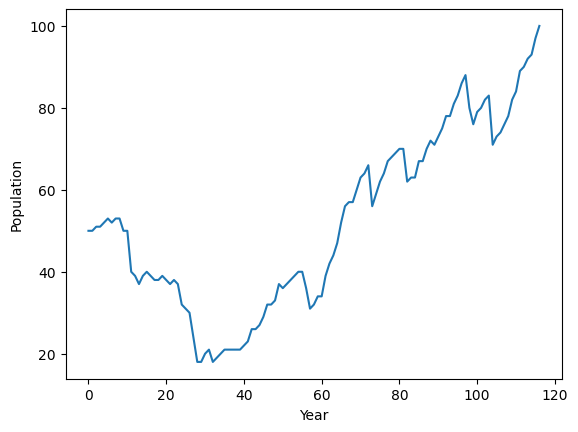

In [6]:
print("--------The Critter Simulation has begun!---------\n\n")
popSim()
while len(critterList) < 100 and len(critterList) > 1:
    runYear(food, resources, fertility_x, fertility_y)
    year += 1
    print(f"Current year: {year}\n")
    
# plot the results
plt.plot(popList)
plt.ylabel('Population')
plt.xlabel('Year')
plt.show()